<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/main/image_processing/filtering_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering in the frequency domain

### Prepare colab + load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
! ls

Mounted at /content/drive
drive  sample_data


In [2]:
%cd drive/MyDrive/MachineLearning/
#! git clone https://github.com/emely3h/Geospatial_ML.git
%cd Geospatial_ML
! ls

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
data_exploration  evaluation   models	    prepare_data    README.md
docs		  experiments  poetry.lock  pyproject.toml  requirements.txt


In [3]:
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
from skimage import io,filters
from skimage.color import rgb2gray
import cv2 as cv

### asdf

In [4]:
root = "../data_colab/256_256/"

y_mask  = np.load(os.path.join(root,'2022_06_20.npz'))['y_mask']
x_input  = np.load(os.path.join(root,'2022_06_20.npz'))['x_input']

print(x_input.shape)
print(y_mask.shape)

(761, 256, 256, 5)
(761, 256, 256)


In [ ]:

def display_image(display_list):
  plt.figure(figsize=(7, 7))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    if len(display_list[i].shape) == 3:
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        #plt.axis('off')
    else:
        plt.imshow(display_list[i])
  plt.show()

def display(list_train, list_mask):
  for idx, img_train in enumerate(list_train):
    sample_image, sample_mask = list_train[idx], list_mask[idx]
    sample_image = sample_image[..., :4]
    display_image([sample_image, sample_mask])
     

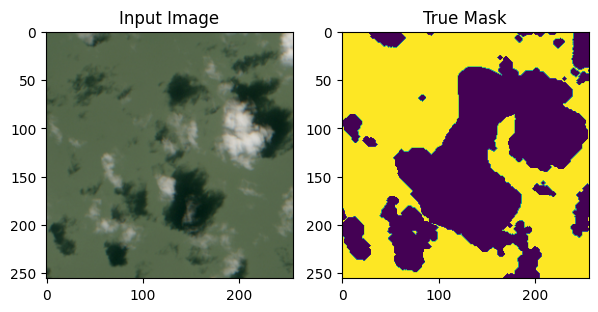

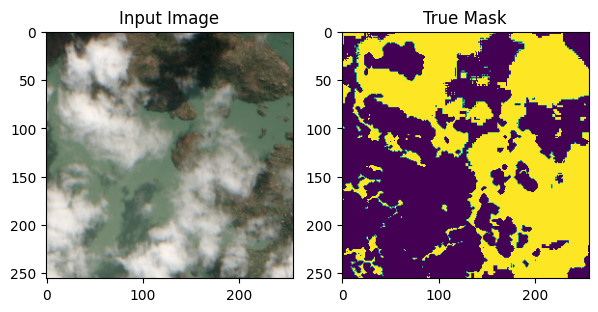

In [ ]:
display(x_input[130:132], y_mask[130:132])

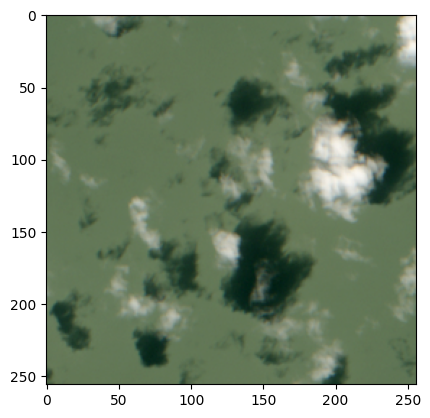

In [ ]:
test = x_input[130][..., :3]
plt.imshow(tf.keras.utils.array_to_img(test))
plt.show()


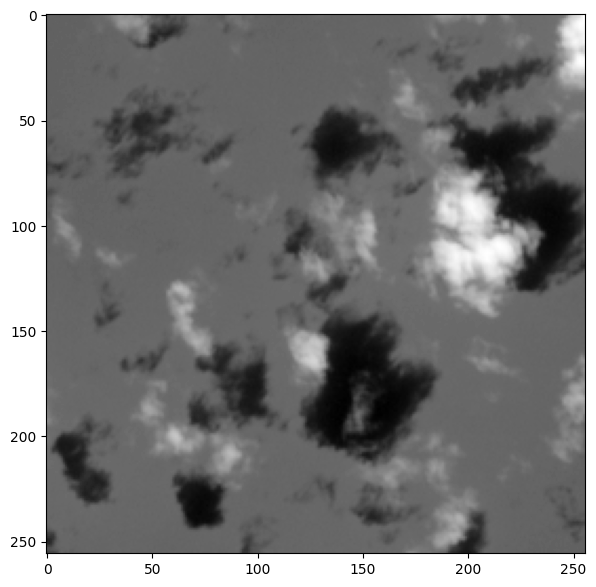

In [ ]:
gray = rgb2gray(test)
plt.figure(figsize=(7, 7))
plt.imshow(gray, cmap='gray')
plt.show()

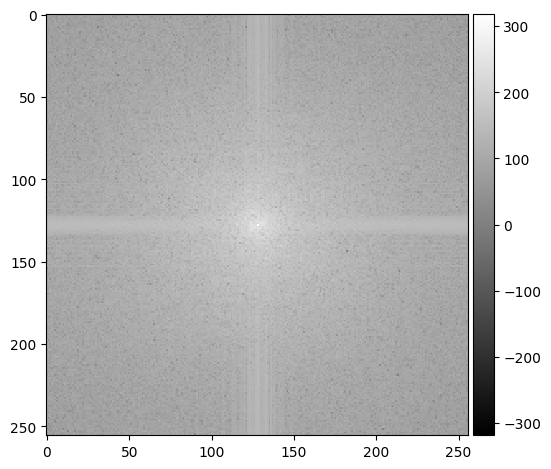

In [ ]:
import numpy as np
from skimage import io, color, img_as_float
from scipy.fftpack import fft2, fftshift

# Convert the image to a float array
image = img_as_float(gray)

# Compute the 2D Fourier transform
f = fft2(image)

# Shift the zero-frequency component to the center of the spectrum
fshift = fftshift(f)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fshift)

# log scale
magnitude_spectrum = 20 * np.log(np.abs(fshift))


# Display the magnitude spectrum
io.imshow(magnitude_spectrum, cmap='gray')
io.show()

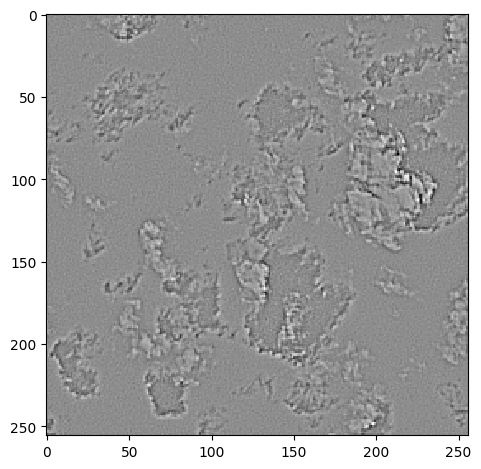

In [ ]:
import numpy as np
from skimage import io, color, img_as_float
from scipy import ndimage

# Convert the image to a float array
image = img_as_float(gray)

# Define a high-pass filter kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply the high-pass filter using convolution
filtered_image = ndimage.convolve(image, kernel)

# Normalize the pixel values to the range [0, 1]
filtered_image = (filtered_image - filtered_image.min()) / (filtered_image.max() - filtered_image.min())

# Display the filtered image
io.imshow(filtered_image)
io.show()

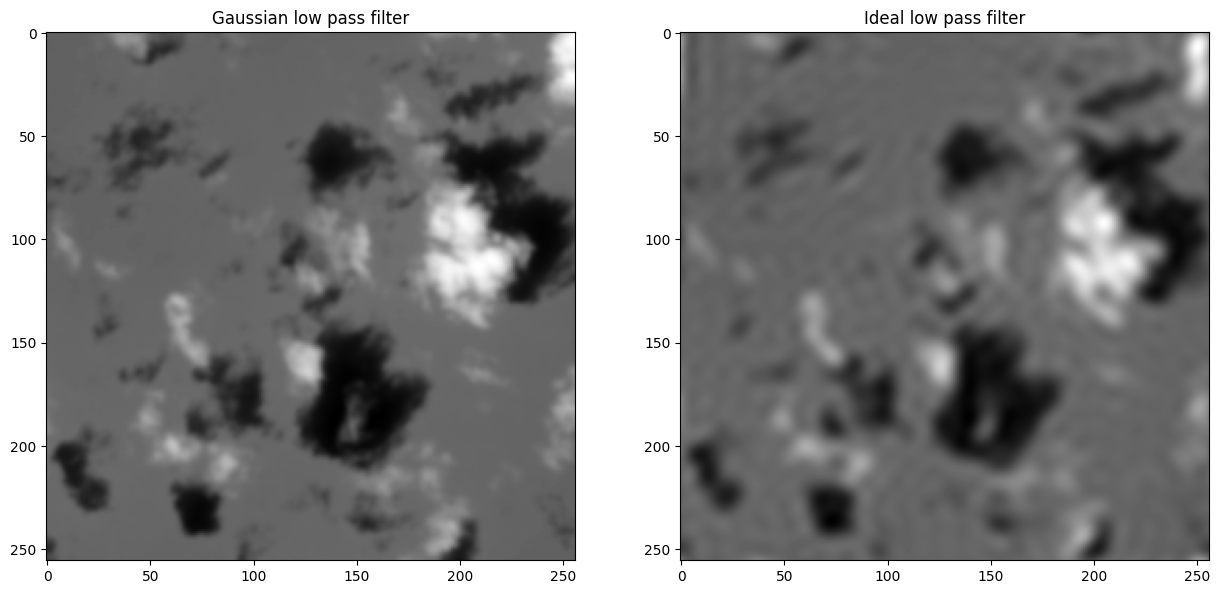

In [ ]:
filtered_image = filters.gaussian(image, sigma=1)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,15))
# Display filtered image
ax1.imshow(filtered_image, cmap='gray')

# Apply Fourier Transform
freq_image = np.fft.fft2(gray)

# Define Ideal Low Pass Filter
cutoff = 20
mask = np.zeros_like(freq_image)
mask[:cutoff, :cutoff] = 1
mask[-cutoff:, :cutoff] = 1
mask[:cutoff, -cutoff:] = 1
mask[-cutoff:, -cutoff:] = 1

# Apply filter
filtered_freq_image = freq_image * mask

# Apply Inverse Fourier Transform
filtered_image = np.fft.ifft2(filtered_freq_image).real

# Display filtered image
ax2.imshow(filtered_image, cmap='gray')

ax1.set_title('Gaussian low pass filter')
ax2.set_title('Ideal low pass filter')

plt.show()

### Magnitude Spectrum
Displaying frequency and magnitude across the horizontal and vertical axe of the input image

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def dft(img_path):
  img = cv.imread(img_path,cv.IMREAD_GRAYSCALE)
  assert img is not None, "file could not be read, check with os.path.exists()"
  dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  #magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
  magnitude_spectrum = np.log(1 + cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

  plt.figure(figsize=(12, 10))
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()
  #print(np.max(dft))
  #print(np.min(dft))
  #print(np.max(magnitude_spectrum))
  #print(np.min(magnitude_spectrum))

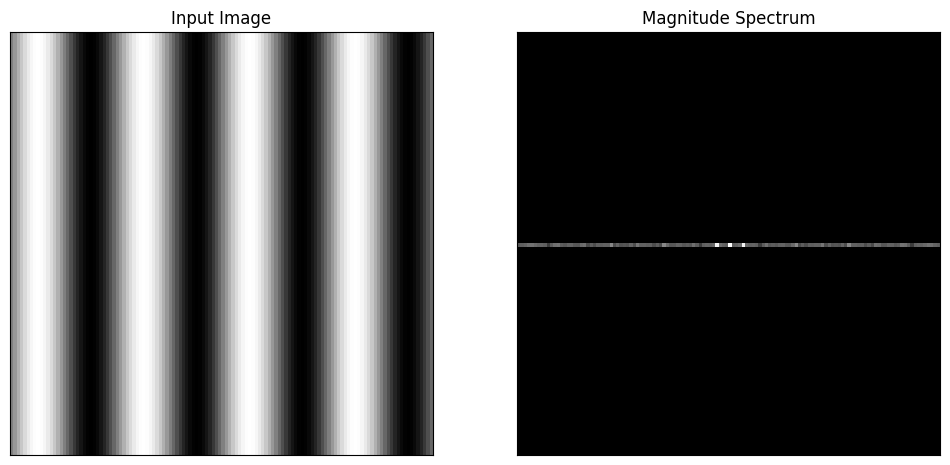

In [30]:
dft('../pics/horzsine2.png')

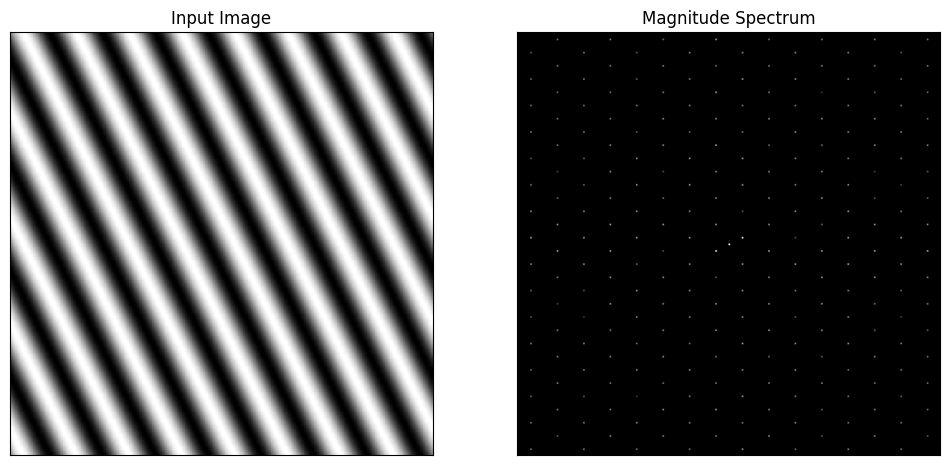

In [31]:
dft('../pics/diagonalsine.jpg')

True


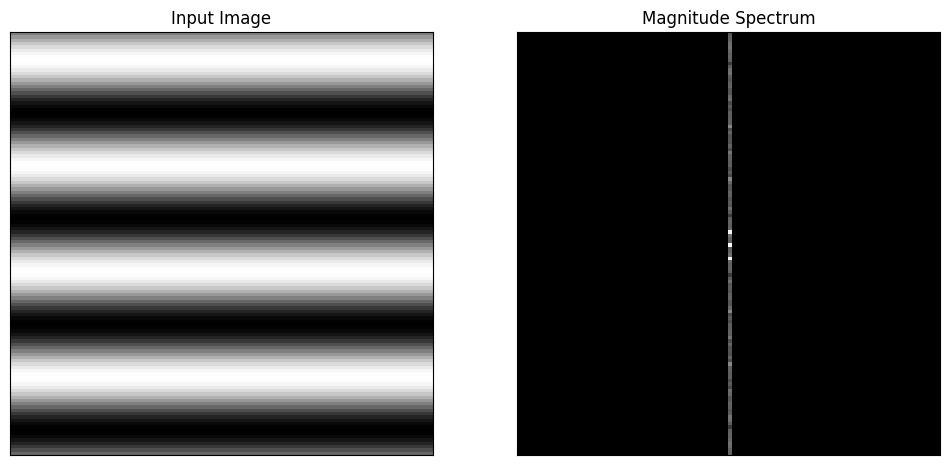

In [32]:
print(os.path.exists('../pics/vertsine.png'))
dft('../pics/vertsine.png')

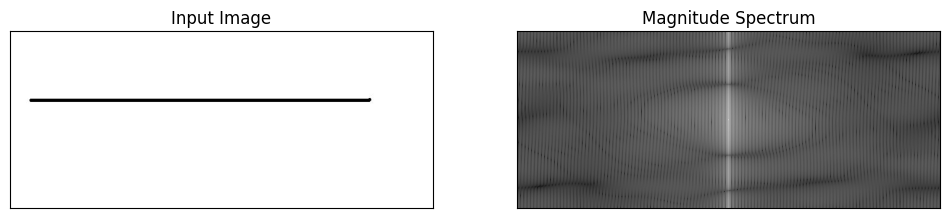

In [33]:
dft('../pics/s2.jpg')

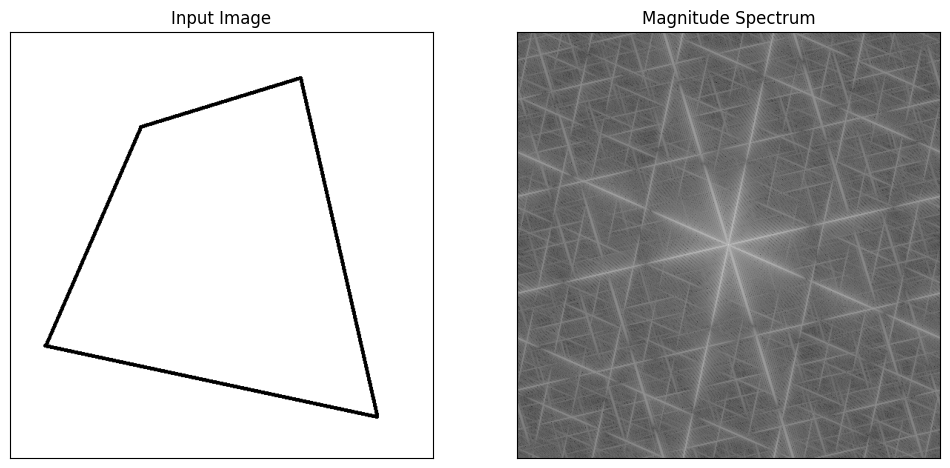

In [34]:
dft('../pics/s4.png')

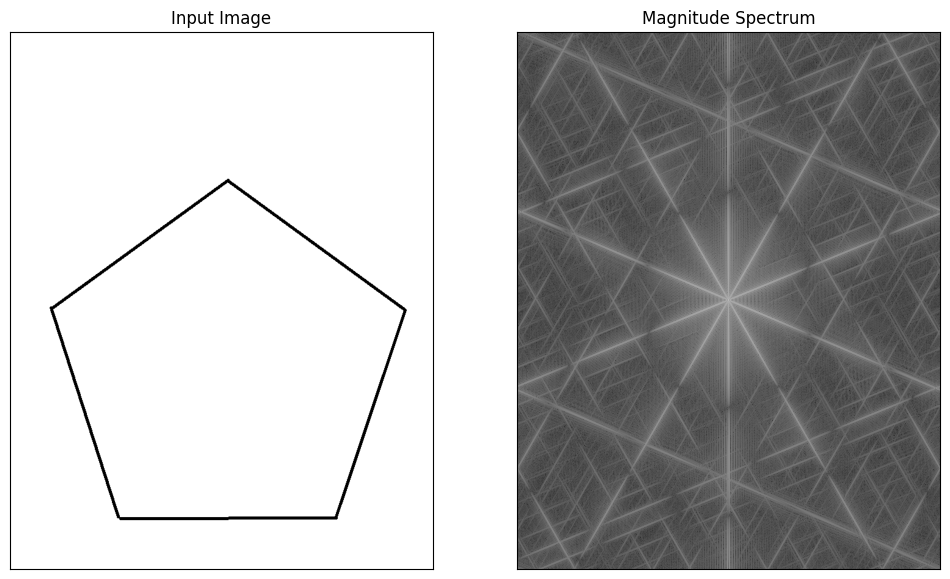

In [35]:
dft('../pics/s5.png')

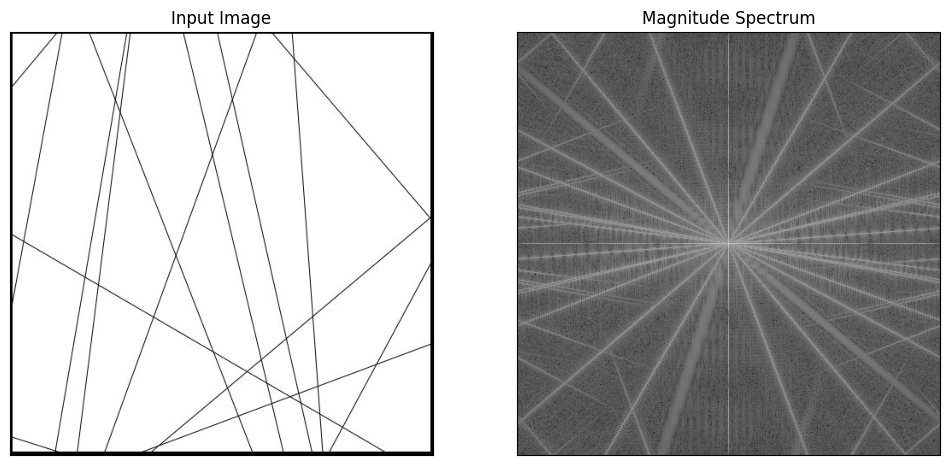

In [36]:
dft('../pics/lines1.jpg')

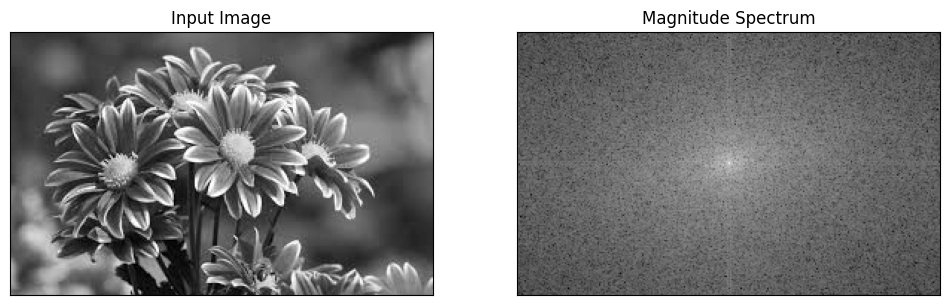

In [37]:
dft('../pics/flowers.jpg')

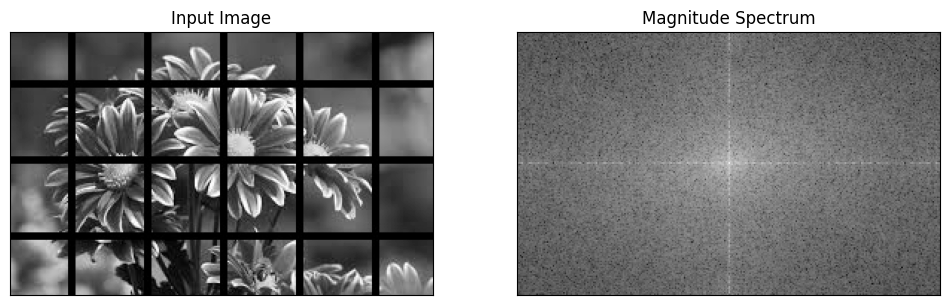

In [38]:
dft('../pics/flowers8.jpg')

### Phase Spectrum

### Low Pass Filter

### High Pass Filter

(177, 284)
(177, 284, 2)


<ipython-input-47-33a05e60ecc1>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img, cmap = 'gray')
<ipython-input-47-33a05e60ecc1>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132),plt.imshow(img_back[:,:,1], cmap = 'gray')


TypeError: ignored

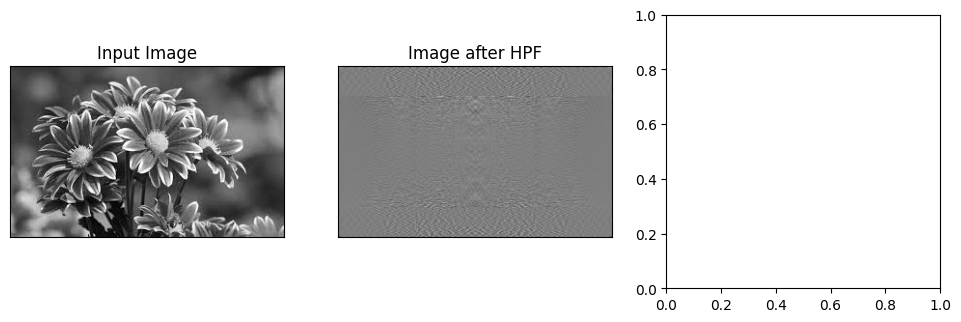

In [47]:
img = cv.imread('../pics/flowers.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
#magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
magnitude_spectrum = np.log(1 + cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize=(12, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
#plt.show()


rows, cols = img.shape
crow,ccol = rows//2 , cols//2
dft_shift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(dft_shift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
print(img.shape)
print(img_back.shape)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back[:,:,1], cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()